In [1]:
# somewhat similar (but this written mostly before reading that)
#https://www.pluralsight.com/guides/deep-learning-model-add

In [2]:
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

import numpy as np

Using TensorFlow backend.


In [3]:
trainingDataSize = 10000
epochs = 20

In [4]:
X = np.random.normal( loc=0, scale=100, size=[trainingDataSize,2] )


In [5]:
Y = X.sum(axis=1)
Ynoisy = Y + np.random.normal( scale = 3, size=trainingDataSize )

In [6]:
Y

array([ 275.82556912,   25.96127559,  131.27764075, ...,    5.41354167,
       -108.42504546, -204.62720813])

In [7]:
Ynoisy

array([ 272.39872002,   23.98683476,  129.45108557, ...,    9.58329781,
       -106.44291217, -201.42198388])

In [8]:
model = Sequential([
    #Flatten(), # input_shape=(2,)
    Dense(units=2, activation='relu'),
    Dense(units=20, activation='relu'),
	Dense(units=20, activation='relu'),
    Dense(units=1)
])
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae'])

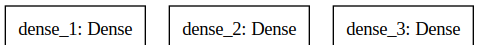

In [9]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [10]:
model.fit(X, Ynoisy, epochs=epochs, batch_size=100)


Epoch 1/20
10000/10000 [==============================] - 1s 67us/step - loss: 12403.6721 - mae: 82.9913
Epoch 2/20
10000/10000 [==============================] - 0s 15us/step - loss: 10274.5054 - mae: 67.8996
Epoch 3/20
10000/10000 [==============================] - 0s 15us/step - loss: 9634.8834 - mae: 61.7543
Epoch 4/20
10000/10000 [==============================] - 0s 15us/step - loss: 5291.1649 - mae: 44.2843
Epoch 5/20
10000/10000 [==============================] - 0s 15us/step - loss: 430.9891 - mae: 11.3969
Epoch 6/20
10000/10000 [==============================] - 0s 15us/step - loss: 26.6497 - mae: 4.0888
Epoch 7/20
10000/10000 [==============================] - 0s 15us/step - loss: 23.9844 - mae: 3.8436
Epoch 8/20
10000/10000 [==============================] - 0s 15us/step - loss: 22.0985 - mae: 3.6961
Epoch 9/20
10000/10000 [==============================] - 0s 15us/step - loss: 20.4802 - mae: 3.5585
Epoch 10/20
10000/10000 [==============================] - 0s 15us/step - l

In [11]:
model.predict(np.array([[101,102]]))

array([[202.1715]], dtype=float32)

In [12]:
model.predict(np.array([[95,100]]))

array([[194.31154]], dtype=float32)

In [13]:
model.predict(np.array([[1,2]]))

array([[5.4628277]], dtype=float32)

In [14]:
model.predict(np.array([[2,2]]))

array([[6.5097523]], dtype=float32)

In [15]:
model.predict(np.array([[100,-250]]))

array([[-150.40897]], dtype=float32)

In [16]:
model.predict(np.array([[10000,-2500]]))

array([[7360.332]], dtype=float32)